## Support Vector machine

## Task 1: Exploratory Data Analysis (EDA)

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.simplefilter('ignore')

## 1.Load the dataset and perform fundamental data exploration.

In [ ]:
# loading the dataset
df=pd.read_csv('Pharma_Industry.csv')
df.shape

(500, 6)

In [62]:
df.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [ ]:
# checking for missing values
df.isnull().sum()

Drug Dosage (mg)                  0
Systolic Blood Pressure (mmHg)    0
Heart Rate (BPM)                  0
Liver Toxicity Index (U/L)        0
Blood Glucose Level (mg/dL)       0
Drug Response                     0
dtype: int64

In [ ]:
## checking for duplicates
df.duplicated().sum()

np.int64(0)

## 2.Utilize histograms, box plots, or density plots to understand feature distributions.

In [ ]:
# selecting numreical columns
num_cols = df.select_dtypes(include=['int','float']).columns
num_cols

Index(['Drug Dosage (mg)', 'Systolic Blood Pressure (mmHg)',
       'Heart Rate (BPM)', 'Liver Toxicity Index (U/L)',
       'Blood Glucose Level (mg/dL)', 'Drug Response'],
      dtype='object')

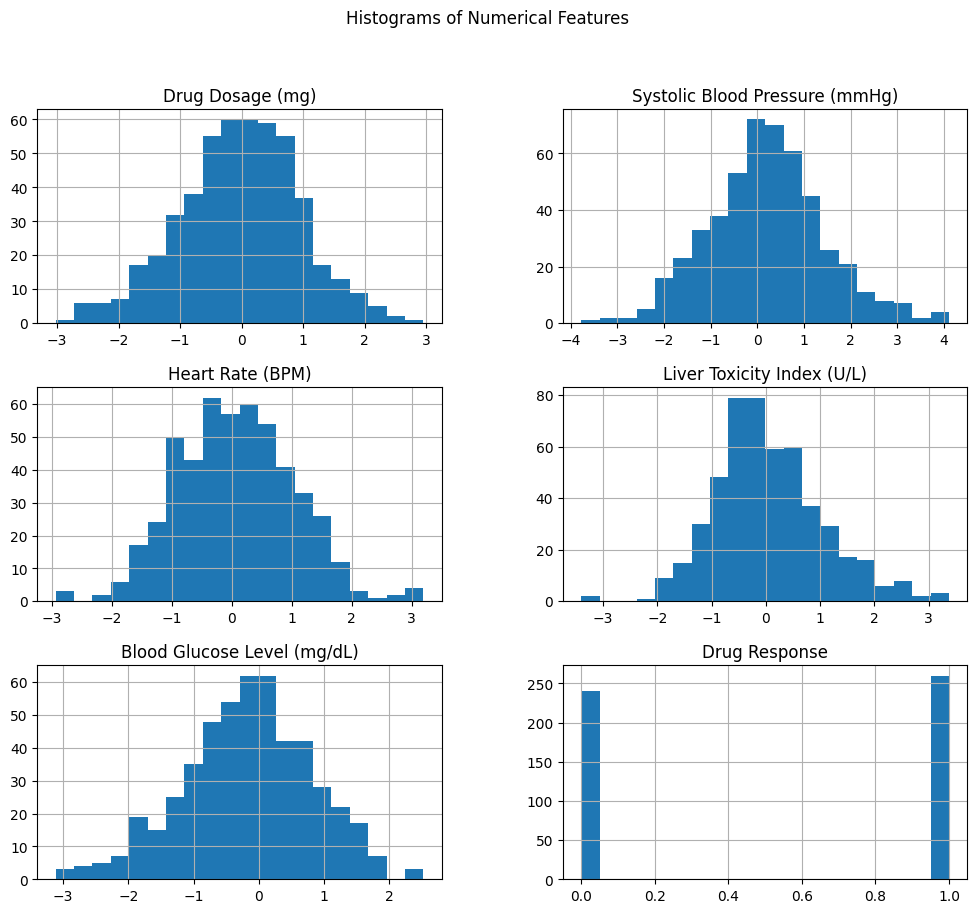

In [67]:
## Ploting Histogram
df[num_cols].hist(figsize=(12,10), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.show()

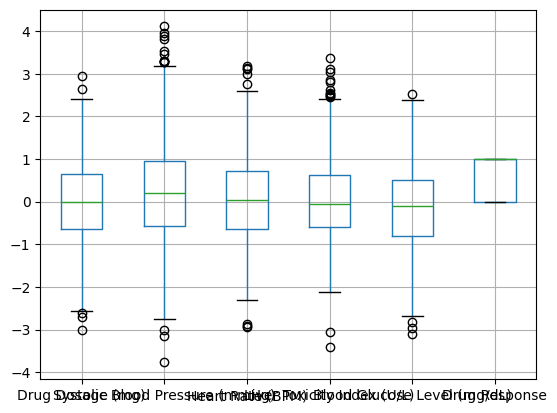

In [68]:
## ploting Boxplot

df.boxplot()
plt.show()

In [69]:
#removing outliers

def outlier_cappin(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extrem=Q1-1.5*IQR
    upper_extrem=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x:lower_extrem if x<lower_extrem else upper_extrem if x>upper_extrem else x)


for col in df.select_dtypes(['int','float']).columns:
    outlier_cappin(df,col)


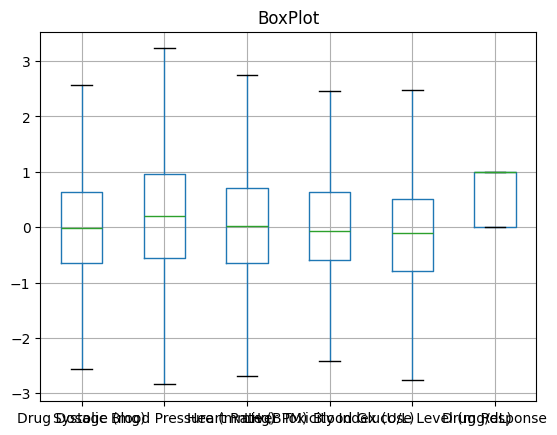

In [70]:
## Box Plot after removing outliers
df.boxplot()
plt.title('BoxPlot')
plt.show()

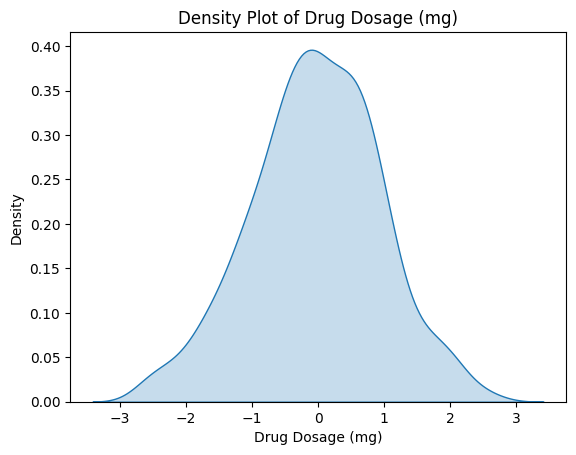

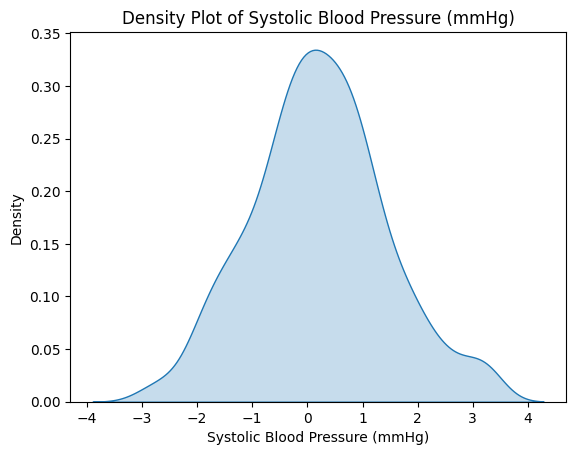

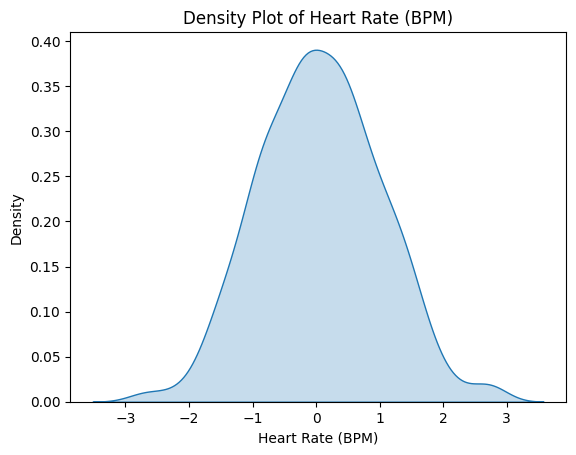

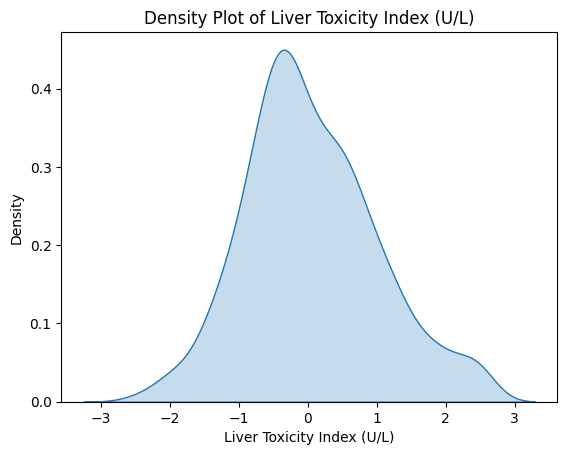

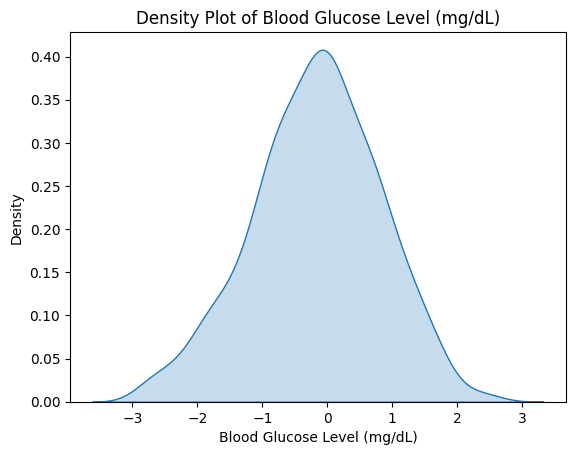

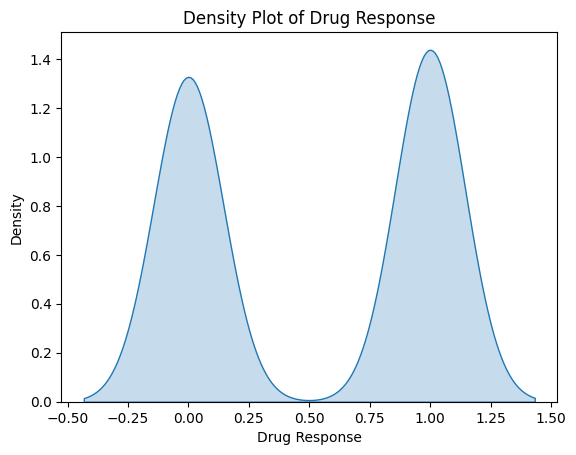

In [71]:
## Density plot(kde plot)

for col in num_cols:
    sns.kdeplot(df[col], shade=True)
    plt.title(f"Density Plot of {col}")
    plt.show()

## 3.Investigate feature correlations to discern relationships within the data.

In [72]:
corr=df[num_cols].corr()
corr

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
Drug Dosage (mg),1.000000,0.087760,0.040512,0.128059,0.010070,0.043340
Systolic Blood Pressure (mmHg),0.087760,1.000000,-0.041466,0.273864,0.041263,0.308012
Heart Rate (BPM),0.040512,-0.041466,1.000000,0.004618,0.051423,-0.011235
Liver Toxicity Index (U/L),0.128059,0.273864,0.004618,1.000000,0.229714,0.437289
Blood Glucose Level (mg/dL),0.010070,0.041263,0.051423,0.229714,1.000000,0.169445
Drug Response,0.043340,0.308012,-0.011235,0.437289,0.169445,1.000000


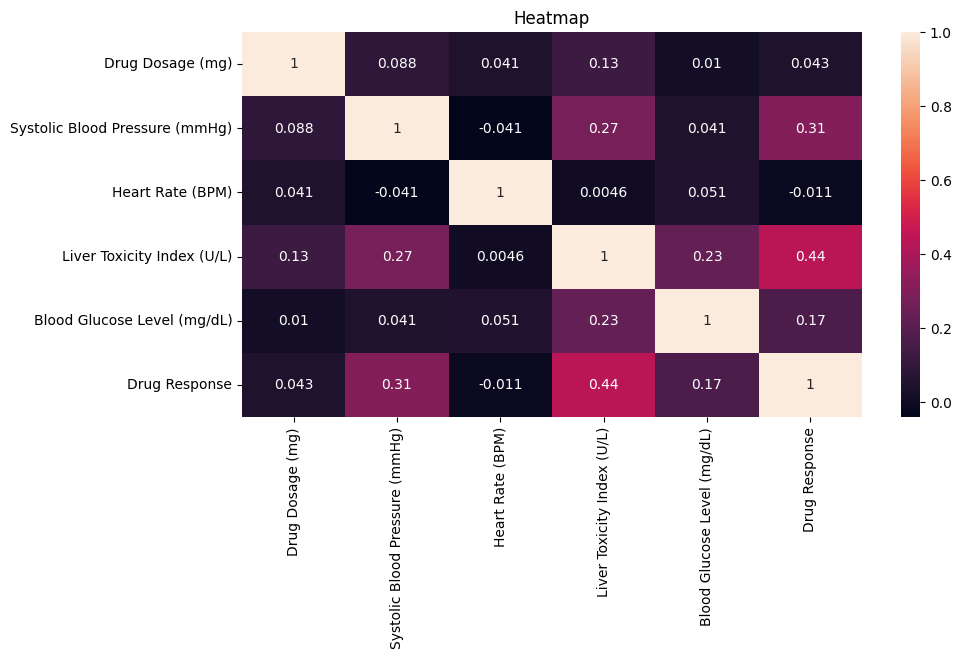

In [73]:
## Correlation Heatmap 

plt.figure(figsize=(10,5))
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.title('Heatmap')
plt.show()

## Task 2: Data Preprocessing

## 1.Encode categorical variables if necessary.

In [74]:
## identifying the categorical columns

cat_col=df.select_dtypes(include=['object']).columns
cat_col

Index([], dtype='object')

In [75]:
df.dtypes
## since there are no categorical columns and contains only numreic columns in dataset
# no encoding (One-Hot Encoding or Label Encoding) was necessary.

Drug Dosage (mg)                  float64
Systolic Blood Pressure (mmHg)    float64
Heart Rate (BPM)                  float64
Liver Toxicity Index (U/L)        float64
Blood Glucose Level (mg/dL)       float64
Drug Response                       int64
dtype: object

## 2.Split the dataset into training and testing sets.


In [ ]:
## definig the features and target
target=df[['Drug Response']]
features=df.drop(columns=['Drug Response'])
print(target.head())
print(features.head())

   Drug Response
0              1
1              1
2              0
3              1
4              1
   Drug Dosage (mg)  Systolic Blood Pressure (mmHg)  Heart Rate (BPM)  \
0         -0.128538                        0.303280         -1.881849   
1         -1.846188                        2.865142         -0.929511   
2         -1.252393                       -1.541613          0.363632   
3          1.992515                       -1.142779         -0.766657   
4          0.377100                        0.538410         -0.029263   

   Liver Toxicity Index (U/L)  Blood Glucose Level (mg/dL)  
0                    0.258286                    -0.792011  
1                    2.463913                    -0.719447  
2                   -0.325370                     0.191314  
3                    0.975286                    -0.823355  
4                    1.896015                    -0.960130  


In [ ]:
## splitting the data into train and test
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=25)
print(x_train.head())
print(x_test.head())
print(y_train.head())
print(y_test.head())

     Drug Dosage (mg)  Systolic Blood Pressure (mmHg)  Heart Rate (BPM)  \
250         -0.387131                       -0.198050         -0.045411   
112         -0.313058                       -0.194369         -0.000709   
100          0.811397                        1.957503         -1.148263   
379         -0.835143                       -0.339255          2.089539   
385         -1.179040                        0.787627          1.187679   

     Liver Toxicity Index (U/L)  Blood Glucose Level (mg/dL)  
250                    0.811738                    -0.104333  
112                   -0.398275                    -0.914580  
100                    1.863993                     0.350466  
379                   -0.881163                     0.308711  
385                   -1.429271                    -1.299516  
     Drug Dosage (mg)  Systolic Blood Pressure (mmHg)  Heart Rate (BPM)  \
411          0.579633                        0.228161          0.325796   
380          0.511203

## Task 3: Data Visualization

## 1.Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.

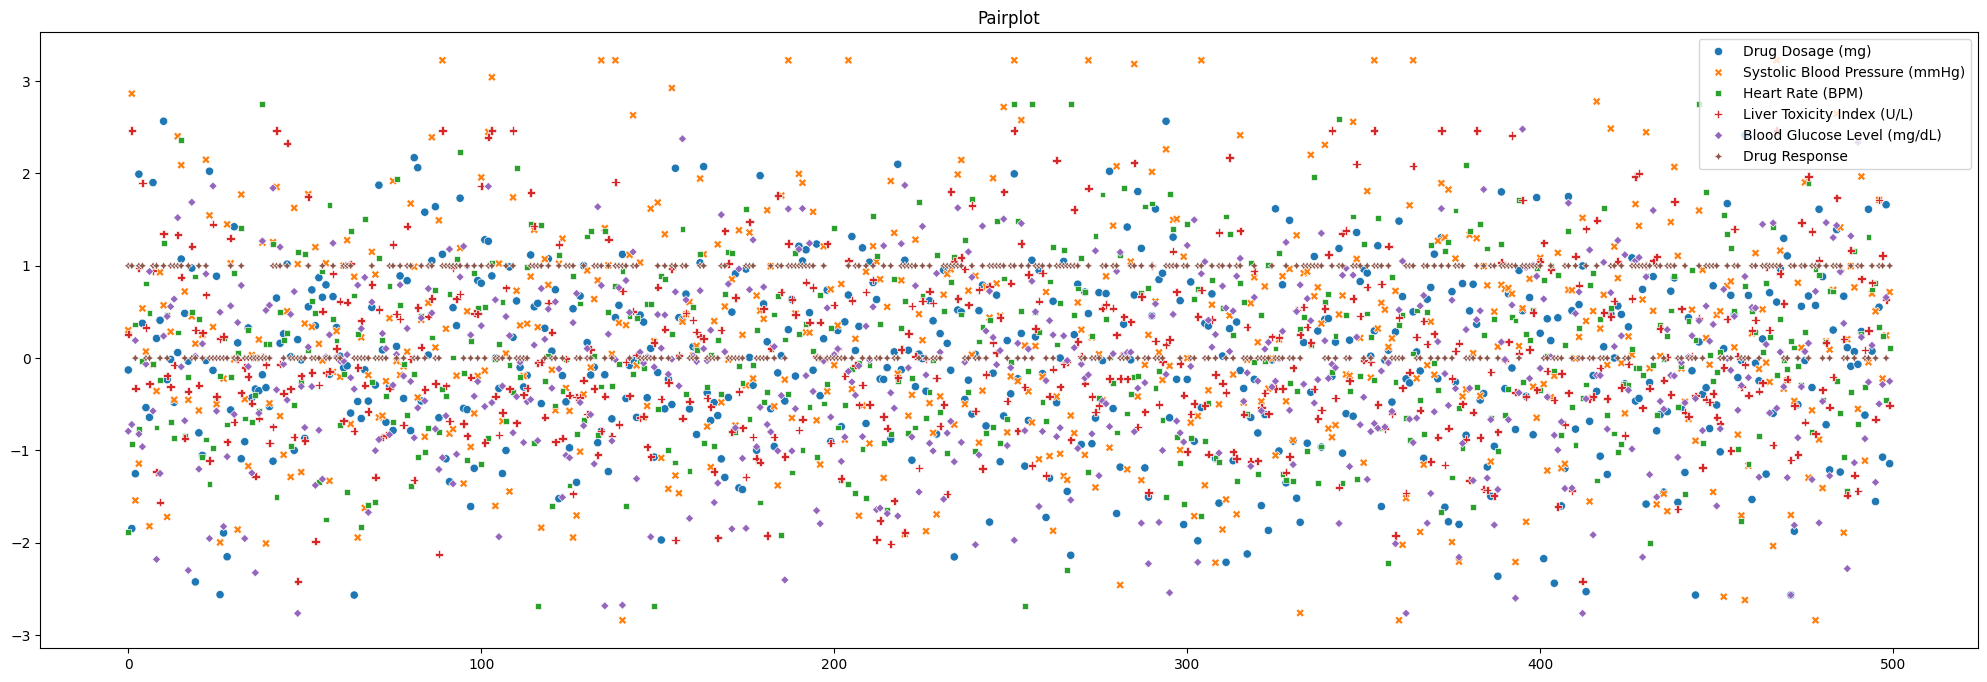

In [ ]:
# ploting scatterplot
plt.figure(figsize=(25,8))
sns.scatterplot(df)
plt.title('Scatter Plot')
plt.show()

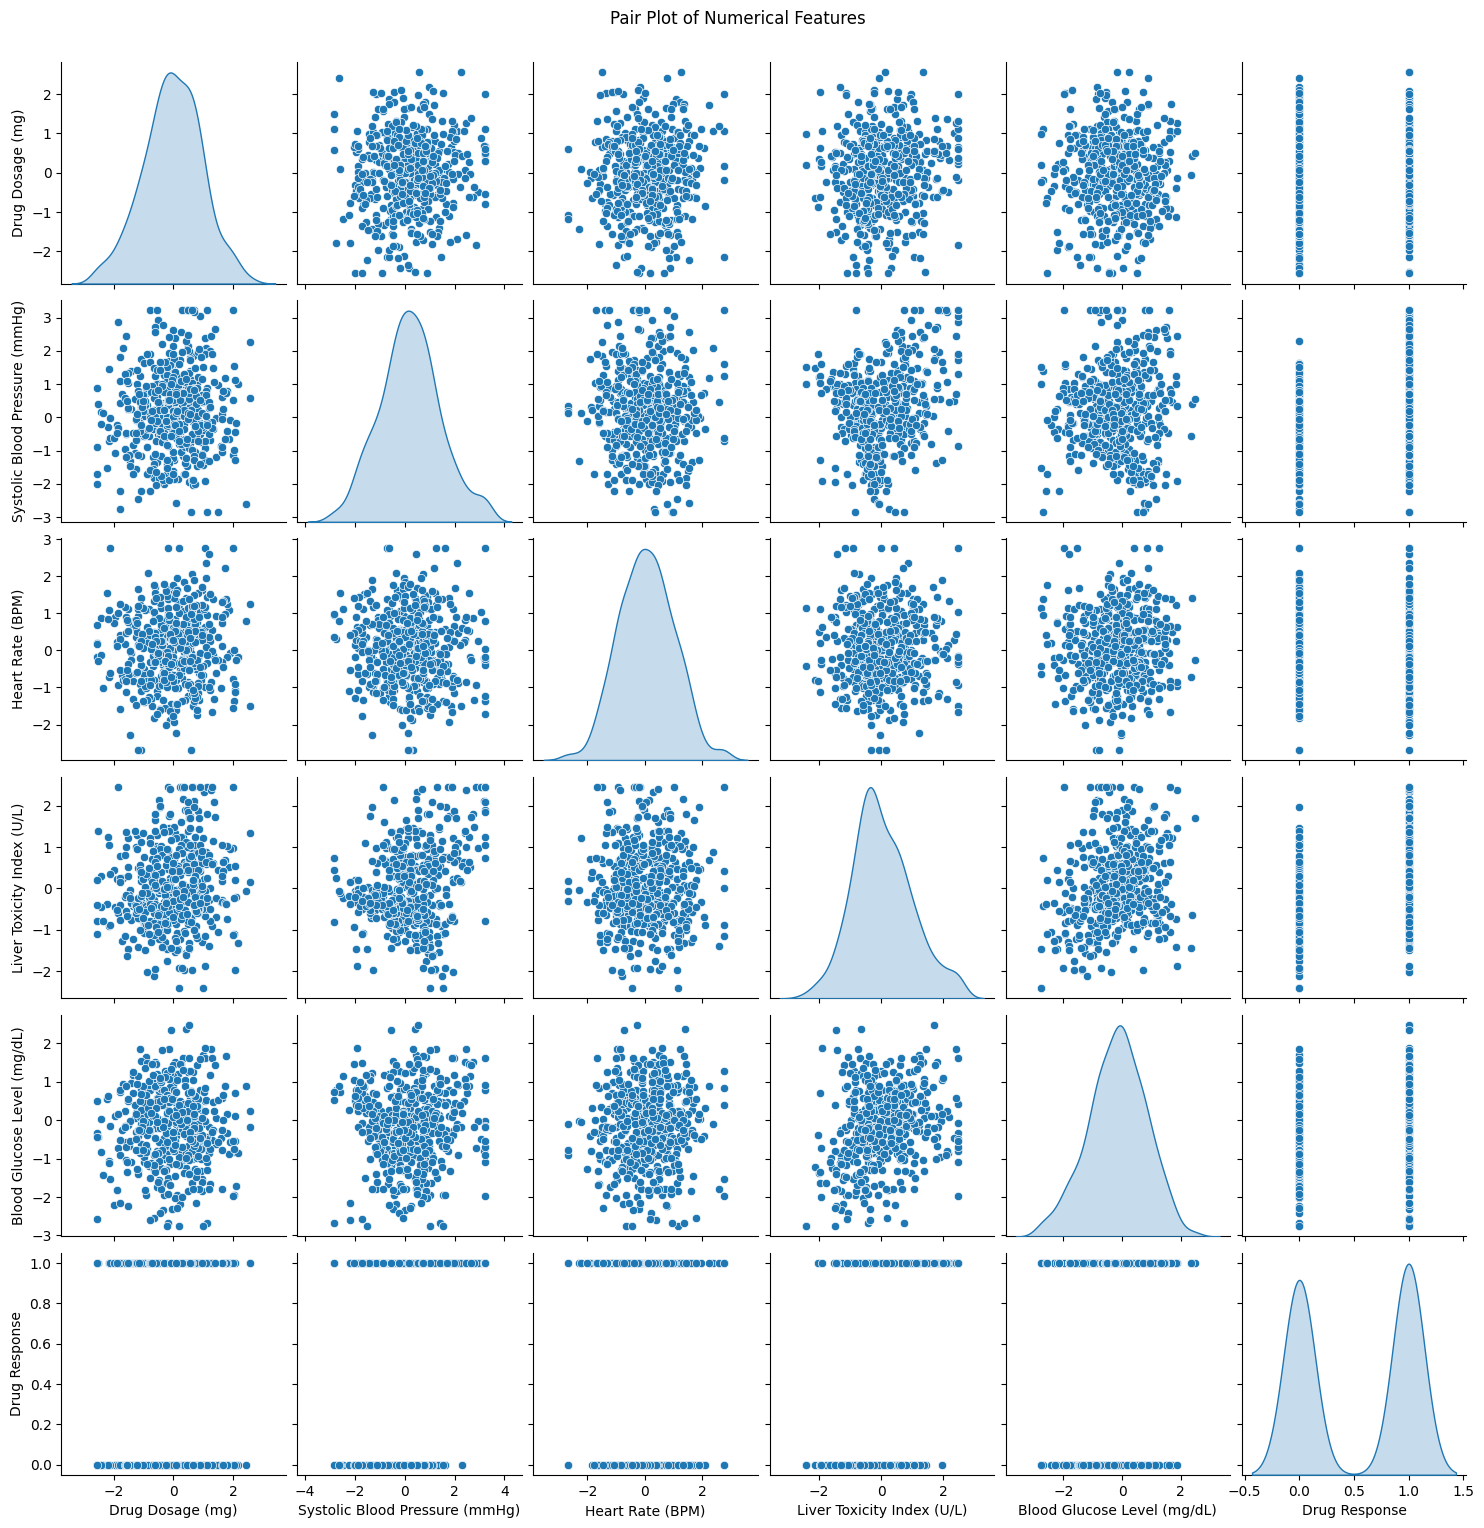

In [ ]:
# pairplot
sns.pairplot(df[num_cols], diag_kind="kde")
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()

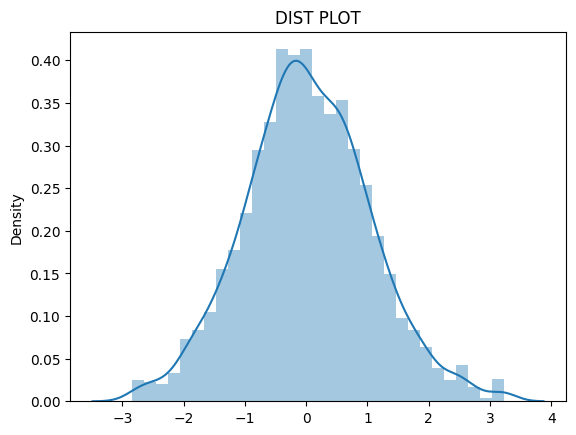

In [88]:
sns.distplot(features)
plt.title('DIST PLOT')
plt.show()

## 2.Visualize class distributions to gauge dataset balance or imbalance.

In [ ]:
## cheking how many samples belongs to each class
df['Drug Response'].value_counts()

Drug Response
1    260
0    240
Name: count, dtype: int64

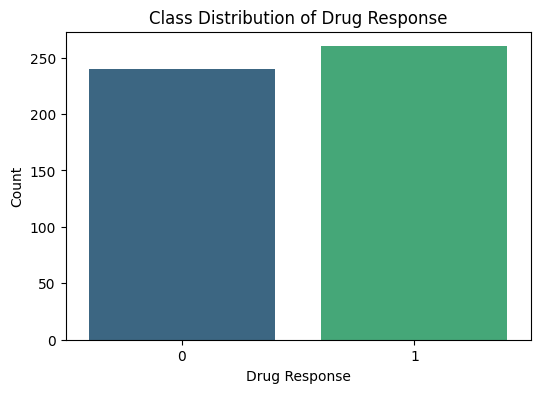

In [ ]:
## Bar Chart for Class Distribution

plt.figure(figsize=(6,4))
sns.countplot(x=df["Drug Response"], palette="viridis")
plt.title("Class Distribution of Drug Response")
plt.xlabel("Drug Response")
plt.ylabel("Count")
plt.show()


- From the bar chart:
   Class 0 count ≈ 240
   Class 1 count ≈ 260
- The difference between the two classes is very small (about 20 samples).
- This is almost perfectly balanced.

## Task 4: SVM Implementation

## 1.Implement a basic SVM classifier using Python libraries like scikit-learn.

In [93]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
svc_model=SVC()

## 2.Train the SVM model on the training data.

In [ ]:
# training the model
svc_model.fit(x_train,y_train)

SVC()

In [ ]:
# making predictions for training data
y_pre=svc_model.predict(x_train)
y_pre

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,

In [ ]:
# prediction using testing data
y_pred=svc_model.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1])

## 3.Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

In [ ]:
## calculating Accuracy,precision,recall,f1-score

acuuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

In [102]:
print("Accuracy:",acuuracy)
print("Precision:",precision)
print("Recall",recall)
print("F1-score:",f1)

Accuracy: 0.712
Precision: 0.7592592592592593
Recall 0.640625
F1-score: 0.6949152542372882


## Task 5: Visualization of SVM Results

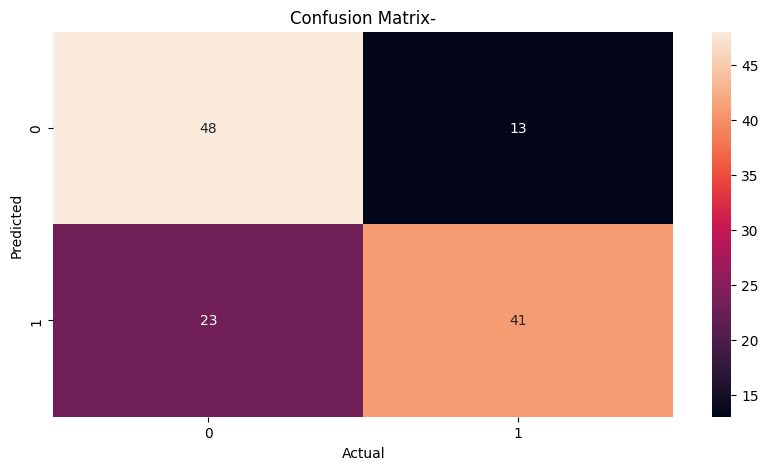

In [ ]:
# ploting confusion matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True)
plt.title("Confusion Matrix-")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

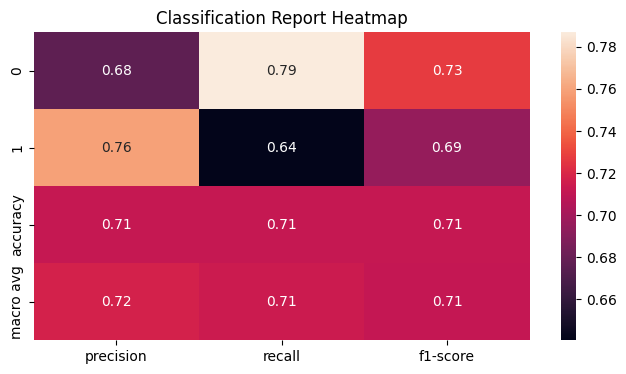

In [ ]:
from sklearn.metrics import classification_report

## Converting the classification report into a heatmap:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(8,4))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True)
plt.title("Classification Report Heatmap")
plt.show()


## Task 6: Parameter Tuning and Optimization
## 1.Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.

In [ ]:
##Linear curnel

svm_linear = SVC(kernel='linear')
svm_linear.fit(x_train, y_train)
pred_linear = svm_linear.predict(x_test)
print("Linear Kernel Accuracy:", accuracy_score(y_test, pred_linear))

Linear Kernel Accuracy: 0.68


In [127]:
## RBF curnel

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(x_train, y_train)
pred_rbf = svm_rbf.predict(x_test)

print("RBF Kernel Accuracy:", accuracy_score(y_test, pred_rbf))


RBF Kernel Accuracy: 0.712


In [ ]:
# Tuning the Regularization Parameter (C)
for c in [0.1, 1, 10, 100]:
    svm_c = SVC(kernel='rbf', C=c)
    svm_c.fit(x_train, y_train)
    pred_c = svm_c.predict(x_test)

    print(f"C={c} → Accuracy: {accuracy_score(y_test, pred_c)}")


C=0.1 → Accuracy: 0.72
C=1 → Accuracy: 0.712
C=10 → Accuracy: 0.704
C=100 → Accuracy: 0.68


In [ ]:
# Experiment with Gamma (affects curve shape)
for g in ['scale', 'auto', 0.1, 1]:
    svm_g = SVC(kernel='rbf', gamma=g)
    svm_g.fit(x_train, y_train)
    pred_g = svm_g.predict(x_test)
    print(f"Gamma={g} → Accuracy: {accuracy_score(y_test, pred_g)}")


Gamma=scale → Accuracy: 0.712
Gamma=auto → Accuracy: 0.704
Gamma=0.1 → Accuracy: 0.72
Gamma=1 → Accuracy: 0.656


In [ ]:
from sklearn.model_selection import GridSearchCV

## Full GridSearchCV (Best Option for Optimization)
param_grid = {
    'C': [0.1, 1, 10, 50, 100],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best Accuracy: 0.784


## Task 7: Comparison and Analysis

## 1.Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).

In [133]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for k in kernels:
    model = SVC(kernel=k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    results[k] = acc
    print(f"Kernel = {k}, Accuracy = {acc:.4f}")


Kernel = linear, Accuracy = 0.6800
Kernel = poly, Accuracy = 0.6480
Kernel = rbf, Accuracy = 0.7120
Kernel = sigmoid, Accuracy = 0.6160


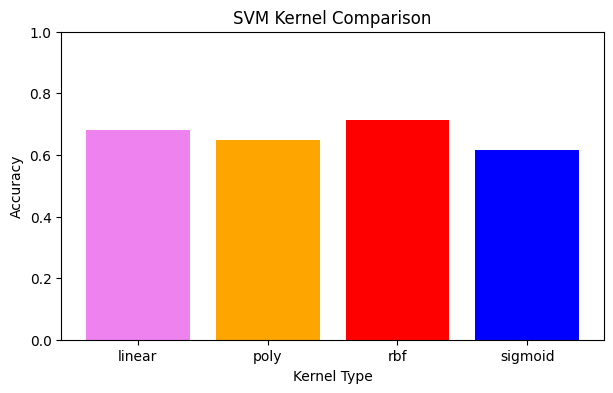

In [137]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.bar(results.keys(), results.values(), color=['violet', 'orange', 'red', 'blue'])
plt.title("SVM Kernel Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Kernel Type")
plt.ylim(0,1)
plt.show()


## 2.Analyze SVM strengths and weaknesses for the dataset based on EDA and visualization results.

In [ ]:
### SVM Strengths

# SVM handles high-dimensional numerical data extremely well.
# since the Pharma dataset contains only numerical features, SVM can efficiently find optimal decision boundaries without being affected by high dimensionality.
# class distribution is almost equal (≈48% vs 52%), which allows SVM to learn both classes effectively without bias.

### SVM Weaknesses

# SVM is very sensitive to feature scaling
# SVM performance heavily depends on good hyperparameter tuning.
# Different kernels gave very different accuracies during testing, showing that SVM requires careful adjustment of C, gamma, and kernel to achieve optimal results.

# 3.Discuss practical implications of SVM in real-world classification tasks.

 SVMs are effective for:

- High-Dimensional Data: Works well in text classification or bioinformatics with many features.

- Non-Linear Decision Boundaries: Uses kernels to separate complex patterns (e.g., in medical diagnosis).

- Robustness to Overfitting: Performs well in small datasets with clear margins. Applications: Image recognition, fraud detection, and bioinformatics.